# STUDENT’S EARLY ATTRITION MODELLING FOR CLEARWATER STATE UNIVERSITY

# PROJECT DESCRIPTION:

Clearwater State University offers a wide variety of degree programs, from online degrees to a doctorate in education. Programs are offered in the streams of the arts, education, business& nursing. Some key strategic goals of the University are:

• Increase enrolment of students  
• Improve retention, progression and graduation rates  
• Recruit better academically qualified undergraduate and graduate students  
• Increase external funding and recognition 

# PROBLEM STATEMENT

Understanding why and when Students are most likely to leave can lead to actions to improve students retention as well as possibly planning new improvements in advance.

This project would fall under what is commonly known as "Student Analytics".

# IN THIS STUDY, WE WILL ATTEMPT TO SOLVE THE FOLLOWING PROBLEM              STATEMENT

1. Identify key drivers of early student attrition  
2. Build a predictive model to identify students with higher early attrition risk 
3. Recommend appropriate interventions based on the analysis

# NOTE:

Early attrition is defined as student drop out within one year of successfully joining the program(completed admission process)

# DATASET ANALYSIS

In this case study, a "Student Applications & Performance.xlsx" dataset was sourced from Clearwater State University Students Attrition & Performance which contains students data for 3400 students with various information about the students. I will use this dataset to predict when students are going to quit by understanding the main drivers of students churn

# IMPORTING PYTHON LIBRARIES

In [1]:
#to ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [2]:
#basic essential libraries
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import random
import string
#common model algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso,  LogisticRegression, RidgeCV
#statsmodel
import statsmodels.api as sm
from scipy import stats
#for data preprocessing and other sampling techniques
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
#evaluation metrics and tuning models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#set visual parameters
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10,6

In [4]:
import os
data_dir=r'C:\Users\pradeepC\Desktop\achievment\02 CAPSTONE BOOTCAMP 15'

In [5]:
os.chdir(data_dir)

In [6]:
data=pd.read_excel('Student Applications & Performance.xlsx')

In [7]:
data.head(4)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0


In [8]:
data.tail(4)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,...,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0
3399,7928405,18,M,BGD 2,Y,N,Art,Creative Writing,NaN,890.0,...,B,Bachelors,12,9,13.0,6.0,0,0,0,0.0


In [9]:
data.shape

(3400, 56)

# DATA QUALITY CHECKS
To look for any null values, we can just invoke the isnull call as follows

In [10]:
data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

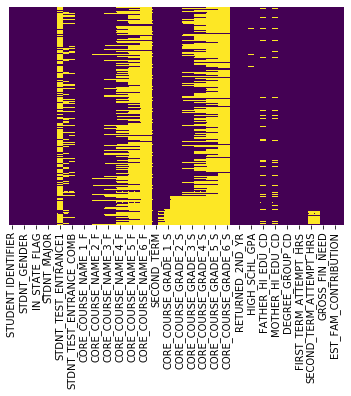

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

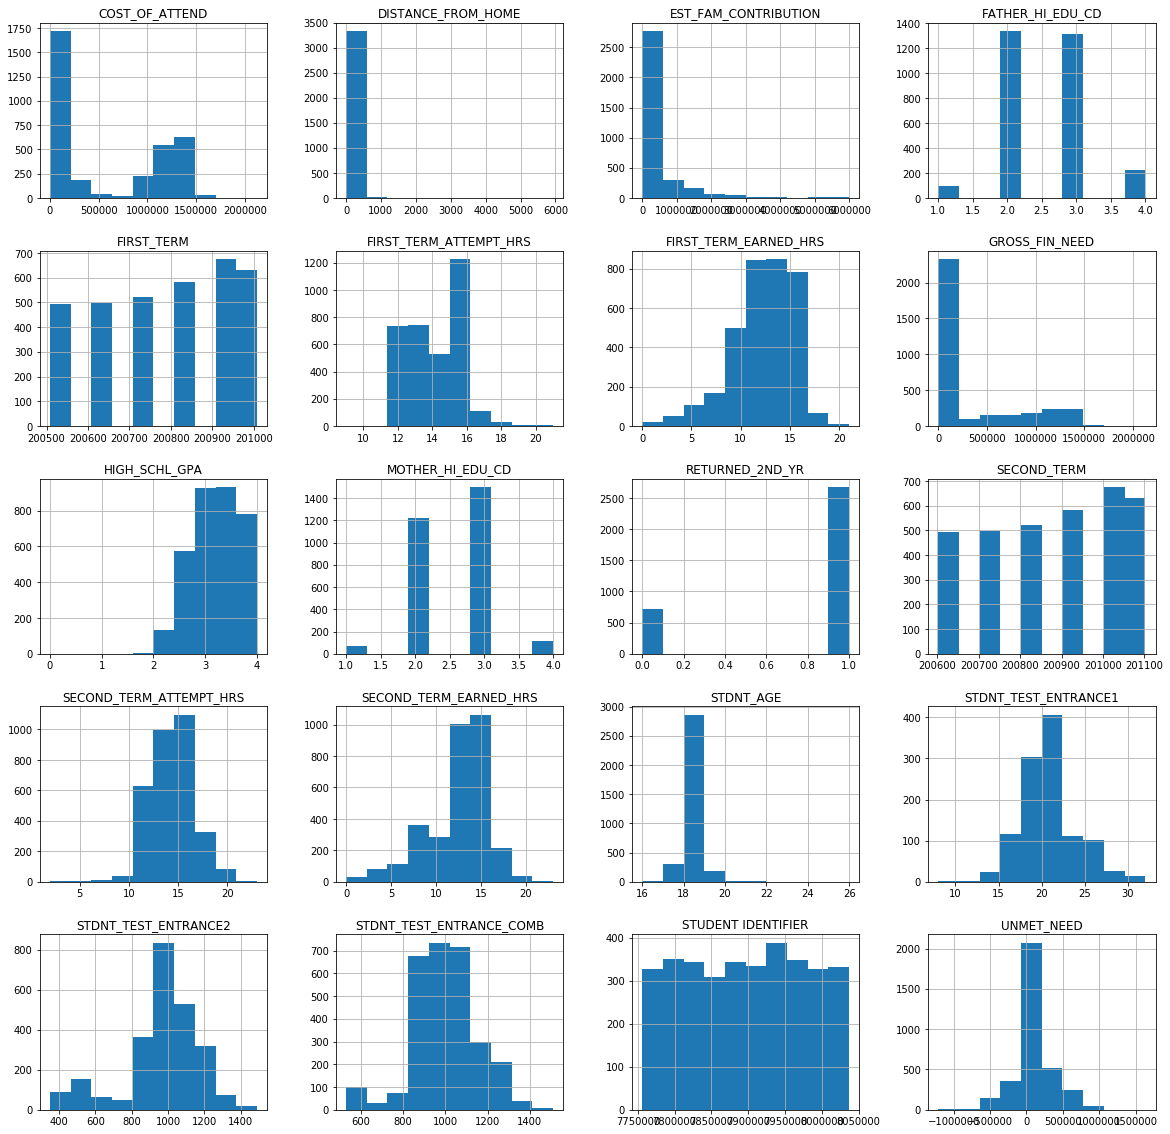

In [12]:
data.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

1) Many histograms are tail-heavy

2) Student Number is likely to be a unique identifier for Students given the feature

3) Our target variable is column='RETURNED_2ND_YR'

# DROPING COLUMNS

In [13]:
data.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2',
           'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD','CORE_COURSE_NAME_4_F',
           'CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F',
          'CORE_COURSE_GRADE_6_F','CORE_COURSE_GRADE_6_S','CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_5_S',
           'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_NAME_4_S','STDNT_MINOR',
          'HIGH_SCHL_NAME'], axis=1, inplace=True)

# TARGET VARIABLE

In [14]:
def d(x):
    if x==0.0:
        return 1.0
    else:
        return 0.0

In [15]:
data['RETURNED_2ND_YR']=data['RETURNED_2ND_YR'].map(d)

In [16]:
data['RETURNED_2ND_YR'].value_counts()

0.0    2677
1.0     723
Name: RETURNED_2ND_YR, dtype: int64

DATA CLEANING

In [17]:
data['FIRST_TERM']=data['FIRST_TERM'].replace({200508:2005,200608:2006,200708:2007,200808:2008,200908:2009,201008:2010})
data['SECOND_TERM']=data['SECOND_TERM'].replace({200602:2006,200702:2007,200802:2008,200902:2009,201002:2010,201102:2011})

In [18]:
data['CORE_COURSE_NAME_1_F']=data['CORE_COURSE_NAME_1_F'].str.slice(0,4)

In [19]:
data['CORE_COURSE_NAME_2_F']=data['CORE_COURSE_NAME_2_F'].str.slice(0,4)

In [20]:
data['CORE_COURSE_NAME_3_F']=data['CORE_COURSE_NAME_3_F'].str.slice(0,4)

In [21]:
from statsmodels.tools import add_constant as add_constant
data = add_constant(data)
data.head()

,const,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,...,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,1.0,7808615,18,F,BGD 1,Y,N,Undeclared,1150.0,2007,...,No Information,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,1.0,7830063,19,F,BGD 1,N,N,Undeclared,1190.0,2008,...,College/Beyond,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,1.0,7847538,18,M,BGD 1,Y,N,Mathematics,1030.0,2010,...,Other/Unknown,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,1.0,8006429,18,M,BGD 1,Y,N,Undeclared,1220.0,2007,...,College/Beyond,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,1.0,7962680,18,F,BGD 1,Y,N,Art,1190.0,2008,...,High School,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [22]:
from scipy.stats import norm, skew

(mu, sigma) = norm.fit(data.loc[data['RETURNED_2ND_YR'] == 1, 'STDNT_AGE'])
print(
    'Ex-student: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(data.loc[data['RETURNED_2ND_YR'] == 0, 'STDNT_AGE'])
print('Current student: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-student: average age = 18.0 years old and standard deviation = 0.6
Current student: average age = 18.0 years old and standard deviation = 0.5


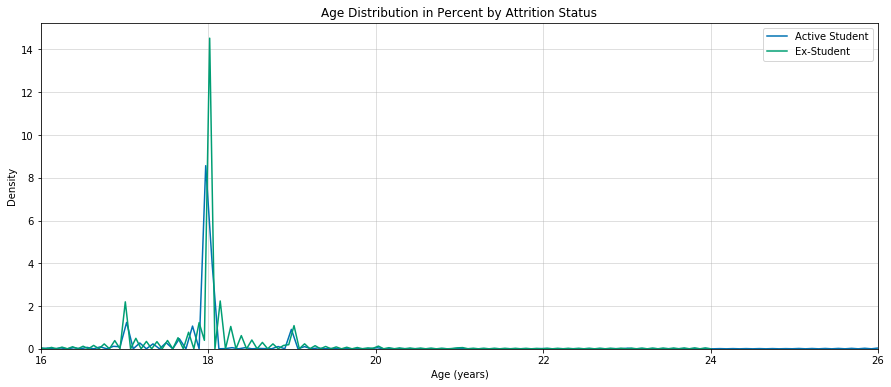

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['RETURNED_2ND_YR'] == 0, 'STDNT_AGE'], label = 'Active Student')
sns.kdeplot(data.loc[data['RETURNED_2ND_YR'] == 1, 'STDNT_AGE'], label = 'Ex-Student')
plt.xlim(left=16, right=26)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

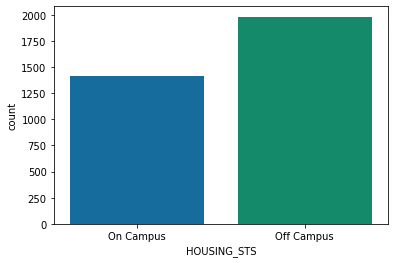

In [24]:
sns.countplot(x='HOUSING_STS',data=data)
#data['HOUSING_STS'].value_counts()

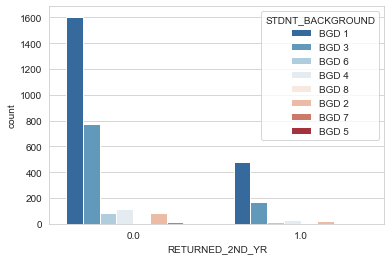

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='STDNT_BACKGROUND',data=data,palette='RdBu_r')

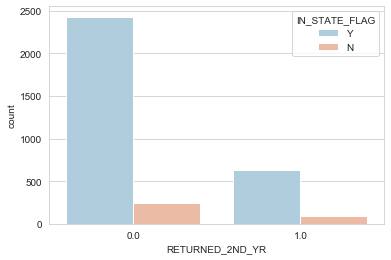

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='IN_STATE_FLAG',data=data,palette='RdBu_r')

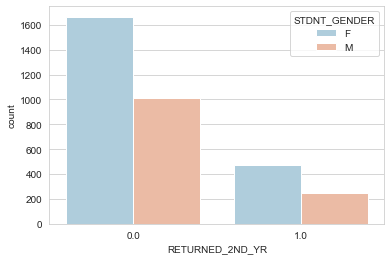

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='STDNT_GENDER',data=data,palette='RdBu_r')

In [28]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

const                             0.00
STUDENT IDENTIFIER           136968.75
STDNT_AGE                         0.00
STDNT_TEST_ENTRANCE_COMB        200.00
FIRST_TERM                        3.00
SECOND_TERM                       3.00
RETURNED_2ND_YR                   0.00
DISTANCE_FROM_HOME               69.00
HIGH_SCHL_GPA                     0.69
FIRST_TERM_ATTEMPT_HRS            2.00
FIRST_TERM_EARNED_HRS             4.00
SECOND_TERM_ATTEMPT_HRS           3.00
SECOND_TERM_EARNED_HRS            4.00
GROSS_FIN_NEED               599580.00
COST_OF_ATTEND              1192815.00
EST_FAM_CONTRIBUTION         324180.00
UNMET_NEED                   187615.50
dtype: float64


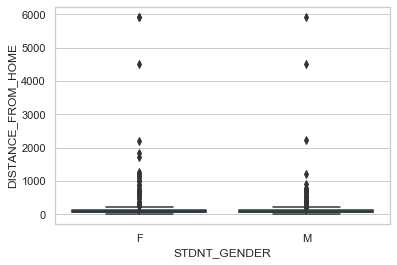

In [29]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["STDNT_GENDER"],y='DISTANCE_FROM_HOME',data=data,palette='winter')

In [30]:
print(data['DISTANCE_FROM_HOME'].skew())
data['DISTANCE_FROM_HOME'].describe()

18.439510065174744


count    3375.000000
mean       99.825185
std       235.196984
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [31]:
print(data['DISTANCE_FROM_HOME'].quantile(0.10))
print(data['DISTANCE_FROM_HOME'].quantile(0.90))

0.0
150.0


In [32]:
data['DISTANCE_FROM_HOME'] = np.where(data['DISTANCE_FROM_HOME'] <0.0, 0.0,data['DISTANCE_FROM_HOME'])
data['DISTANCE_FROM_HOME'] = np.where(data['DISTANCE_FROM_HOME'] >150.0, 150.0,data['DISTANCE_FROM_HOME'])
print(data['DISTANCE_FROM_HOME'].skew())

-0.07085149394802058


In [33]:
data.groupby('STDNT_GENDER')['DISTANCE_FROM_HOME'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,2120.0,81.237264,52.071527,0.0,69.0,69.0,138.0,150.0
M,1255.0,76.185657,49.978015,0.0,69.0,69.0,136.0,150.0


In [34]:
def stud_comb(cols):
    DISTANCE_FROM_HOME=cols[0]
    STDNT_GENDER=cols[1]
    
    if pd.isnull(DISTANCE_FROM_HOME):
        if STDNT_GENDER=='F':
            return 81.237264
        else:
            return 76.185657
    else:   
        return DISTANCE_FROM_HOME

In [35]:
data['DISTANCE_FROM_HOME']=data[['DISTANCE_FROM_HOME','STDNT_GENDER']].apply(stud_comb,axis=1)

In [36]:
data['FIRST_TERM_PERFOMANCE']=data['FIRST_TERM_EARNED_HRS']/data['FIRST_TERM_ATTEMPT_HRS']

In [37]:
data['SECOND_TERM_PERFOMANCE']=data['SECOND_TERM_EARNED_HRS']/data['SECOND_TERM_ATTEMPT_HRS']

In [38]:
data['SECOND_TERM_PERFOMANCE'].describe()

count    3191.000000
mean        0.872315
std         0.200743
min         0.000000
25%         0.769231
50%         1.000000
75%         1.000000
max         1.055556
Name: SECOND_TERM_PERFOMANCE, dtype: float64

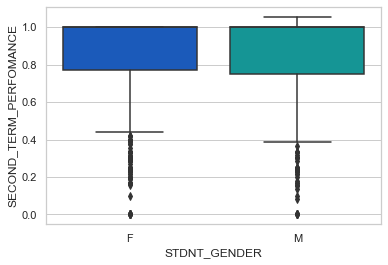

In [39]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["STDNT_GENDER"],y='SECOND_TERM_PERFOMANCE',data=data,palette='winter')

In [40]:
print(data['SECOND_TERM_PERFOMANCE'].skew())
data['SECOND_TERM_PERFOMANCE'].describe()

-1.7919656956699828


count    3191.000000
mean        0.872315
std         0.200743
min         0.000000
25%         0.769231
50%         1.000000
75%         1.000000
max         1.055556
Name: SECOND_TERM_PERFOMANCE, dtype: float64

In [41]:
print(data['SECOND_TERM_PERFOMANCE'].quantile(0.10))
print(data['SECOND_TERM_PERFOMANCE'].quantile(0.90))

0.5833333333333334
1.0


In [42]:
data['SECOND_TERM_PERFOMANCE']=data['SECOND_TERM_PERFOMANCE'].fillna(0.872315)

In [43]:
data.drop(['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS','SECOND_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS'],axis=1, inplace=True)

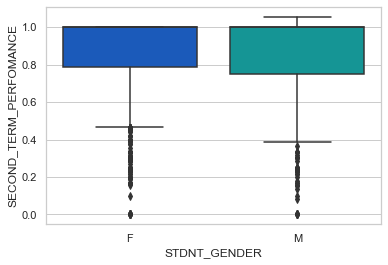

In [44]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["STDNT_GENDER"],y='SECOND_TERM_PERFOMANCE',data=data,palette='winter')

In [45]:
data.groupby('STDNT_GENDER')['STDNT_TEST_ENTRANCE_COMB'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,1832.0,985.185590,150.715274,530.0,910.0,990.0,1070.0,1510.0
M,1050.0,1019.695238,163.281128,530.0,910.0,1030.0,1150.0,1460.0


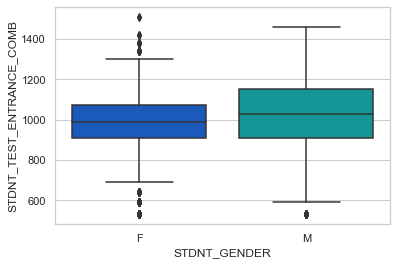

In [46]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["STDNT_GENDER"],y='STDNT_TEST_ENTRANCE_COMB',data=data,palette='winter')

In [47]:
print(data['STDNT_TEST_ENTRANCE_COMB'].skew())
data['STDNT_TEST_ENTRANCE_COMB'].describe()

-0.36469197420163796


count    2882.000000
mean      997.758501
std       156.268221
min       530.000000
25%       910.000000
50%       990.000000
75%      1110.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [48]:
print(data['STDNT_TEST_ENTRANCE_COMB'].quantile(0.10))
print(data['STDNT_TEST_ENTRANCE_COMB'].quantile(0.90))

830.0
1190.0


In [49]:
def stud_comb(cols):
    STDNT_TEST_ENTRANCE_COMB=cols[0]
    STDNT_GENDER=cols[1]
    
    if pd.isnull(STDNT_TEST_ENTRANCE_COMB):
        if STDNT_GENDER=='F':
            return 990.0
        else:
            return 1030.0
    else:   
        return STDNT_TEST_ENTRANCE_COMB

In [50]:
data['STDNT_TEST_ENTRANCE_COMB']=data[['STDNT_TEST_ENTRANCE_COMB','STDNT_GENDER']].apply(stud_comb,axis=1)

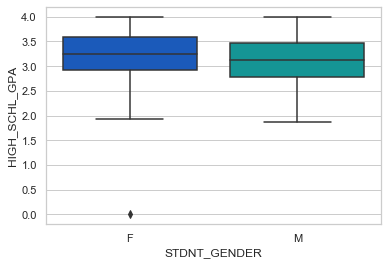

In [51]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["STDNT_GENDER"],y='HIGH_SCHL_GPA',data=data,palette='winter')

In [52]:
data.groupby('STDNT_GENDER')['HIGH_SCHL_GPA'].describe()

,count,mean,std,min,25%,50%,75%,max
STDNT_GENDER,,,,,,,,
F,2111.0,3.249433,0.442327,0.00,2.93,3.25,3.60,4.0
M,1236.0,3.122985,0.466218,1.87,2.79,3.13,3.47,4.0


In [53]:
def gpa(cols):
    HIGH_SCHL_GPA=cols[0]
    STDNT_GENDER=cols[1]
    if pd.isnull(HIGH_SCHL_GPA):
        if STDNT_GENDER=='F':
            return 3.25
        else:
            return 3.13
    else:
        return HIGH_SCHL_GPA

In [54]:
data['HIGH_SCHL_GPA']=data[['HIGH_SCHL_GPA','STDNT_GENDER']].apply(gpa,axis=1)

In [55]:
data['INTERNATIONAL_STS'].value_counts() 

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [56]:
dummya=pd.get_dummies(data['INTERNATIONAL_STS'])
data=pd.concat([data,dummya],axis=1)

In [57]:
data=data.rename(columns = {"N": "INDIAN","Y":"NON_INDIAN"}) 

# ONE HOT ENCODING

In [58]:
top_10=[x for x in data.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Undeclared',
 'Biology',
 'Early Childhood Education',
 'Pre-Nursing',
 'Nursing',
 'Psychology',
 'Pre-Business',
 'Theatre Arts',
 'Music Performance',
 'Criminal Justice']

In [59]:
for label in top_10:
    data[label]=np.where(data['STDNT_MAJOR']==label,1,0)
data[['STDNT_MAJOR']+top_10].head(5)

,STDNT_MAJOR,Undeclared,Biology,Early Childhood Education,Pre-Nursing,Nursing,Psychology,Pre-Business,Theatre Arts,Music Performance,Criminal Justice
0,Undeclared,1,0,0,0,0,0,0,0,0,0
1,Undeclared,1,0,0,0,0,0,0,0,0,0
2,Mathematics,0,0,0,0,0,0,0,0,0,0
3,Undeclared,1,0,0,0,0,0,0,0,0,0
4,Art,0,0,0,0,0,0,0,0,0,0


In [60]:
data.STDNT_BACKGROUND.value_counts().sort_values(ascending=False).head(20)

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [61]:
top_5=[x for x in data.STDNT_BACKGROUND.value_counts().sort_values(ascending=False).head(5).index]
top_5

['BGD 1', 'BGD 3', 'BGD 4', 'BGD 2', 'BGD 6']

In [62]:
for label in top_5:
    data[label]=np.where(data['STDNT_BACKGROUND']==label,1,0)
data[['STDNT_BACKGROUND']+top_5].head(5)

,STDNT_BACKGROUND,BGD 1,BGD 3,BGD 4,BGD 2,BGD 6
0,BGD 1,1,0,0,0,0
1,BGD 1,1,0,0,0,0
2,BGD 1,1,0,0,0,0
3,BGD 1,1,0,0,0,0
4,BGD 1,1,0,0,0,0


In [63]:
top_10=[x for x in data.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]
top_10

['ENGL',
 'HIST',
 'CHEM',
 'MATH',
 'COMM',
 'ARTH',
 'ECON',
 'CPSC',
 'POLS',
 'BIOL']

In [64]:
for label in top_10:
    data[label]=np.where(data['CORE_COURSE_NAME_1_F']==label,1,0)
data[['CORE_COURSE_NAME_1_F']+top_10].head(5)

,CORE_COURSE_NAME_1_F,ENGL,HIST,CHEM,MATH,COMM,ARTH,ECON,CPSC,POLS,BIOL
0,ANTH,0,0,0,0,0,0,0,0,0,0
1,ANTH,0,0,0,0,0,0,0,0,0,0
2,ANTH,0,0,0,0,0,0,0,0,0,0
3,ANTH,0,0,0,0,0,0,0,0,0,0
4,ANTH,0,0,0,0,0,0,0,0,0,0


In [65]:
data=data.rename(columns = {"ENGL": "2015_ENGL",
                            "HIST":"2015_HIST",
                            "CHEM":"2015_CHEM",
                            "MATH":"2015_MATH",
                           "COMM":"2015_COMM",
                           "ARTH":"2015_ARTH",
                           "ECON":"2015_ECON",
                           "CPSC":"2015_CPSC",
                           "POLS":"2015_POLS",
                           "BIOL":"2015_BIOL",}) 

In [66]:
data['CORE_COURSE_NAME_2_F'].mode()

0    ENGL
dtype: object

In [67]:
data['CORE_COURSE_NAME_2_F']=data['CORE_COURSE_NAME_2_F'].fillna('ENGL')

In [68]:
data.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10)

ENGL    897
HIST    500
CHEM    352
MATH    320
COMM    233
POLS    138
ARTH    124
ECON    106
PSYC    103
MUSC     99
Name: CORE_COURSE_NAME_2_F, dtype: int64

In [69]:
top_10=[x for x in data.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]
top_10

['ENGL',
 'HIST',
 'CHEM',
 'MATH',
 'COMM',
 'POLS',
 'ARTH',
 'ECON',
 'PSYC',
 'MUSC']

In [70]:
for label in top_10:
    data[label]=np.where(data['CORE_COURSE_NAME_2_F']==label,1,0)
data[['CORE_COURSE_NAME_2_F']+top_10].head(5)
    

,CORE_COURSE_NAME_2_F,ENGL,HIST,CHEM,MATH,COMM,POLS,ARTH,ECON,PSYC,MUSC
0,ARTH,0,0,0,0,0,0,1,0,0,0
1,GERM,0,0,0,0,0,0,0,0,0,0
2,ENGL,1,0,0,0,0,0,0,0,0,0
3,COMM,0,0,0,0,1,0,0,0,0,0
4,ARTH,0,0,0,0,0,0,1,0,0,0


In [71]:
data=data.rename(columns = {"ENGL": "2016_ENGL",
                            "HIST":"2016_HIST",
                            "CHEM":"2016_CHEM",
                            "MATH":"2016_MATH",
                           "COMM":"2016_COMM",
                           "POLS":"2016_POLS",
                           "ARTH":"2016_ARTH",
                           "ECON":"2016_ECON",
                           "PSYC":"2016_PSYC",
                           "MUSC":"2016_MUSC",}) 

In [72]:
data['CORE_COURSE_NAME_3_F'].isnull().sum()

565

In [73]:
data['CORE_COURSE_NAME_3_F'].mode()

0    ENGL
dtype: object

In [74]:
data['CORE_COURSE_NAME_3_F']=data['CORE_COURSE_NAME_3_F'].fillna(value="ENGL")

In [75]:
top_10=[x for x in data.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending=False).head(10).index]
top_10

['ENGL',
 'HIST',
 'MATH',
 'CHEM',
 'ITDS',
 'COMM',
 'POLS',
 'MUSC',
 'THEA',
 'PSYC']

In [76]:
for label in top_10:
    data[label]=np.where(data['CORE_COURSE_NAME_3_F']==label,1,0)
data[['CORE_COURSE_NAME_3_F']+top_10].head(5)

,CORE_COURSE_NAME_3_F,ENGL,HIST,MATH,CHEM,ITDS,COMM,POLS,MUSC,THEA,PSYC
0,ENGL,1,0,0,0,0,0,0,0,0,0
1,ITDS,0,0,0,0,1,0,0,0,0,0
2,HIST,0,1,0,0,0,0,0,0,0,0
3,ENGL,1,0,0,0,0,0,0,0,0,0
4,CPSC,0,0,0,0,0,0,0,0,0,0


In [77]:
data=data.rename(columns = {"ENGL": "2017_ENGL",
                            "HIST":"2017_HIST",
                            "MATH":"2017_MATH",
                            "CHEM":"2017_CHEM",
                           "ITDS":"2017_ITDS",
                           "COMM":"2017_COMM",
                           "POLS":"2017_POLS",
                           "MUSC":"2017_MUSC",
                           "THEA":"2017_THEA",
                           "PSYC":"2017_PSYC",}) 

In [78]:
top_5=[x for x in data.CORE_COURSE_GRADE_1_F.value_counts().sort_values(ascending=False).head(5).index]
top_5

['C', 'B', 'D', 'F', 'A']

In [79]:
for label in top_5:
    data[label]=np.where(data['CORE_COURSE_GRADE_1_F']==label,1,0)
data[['CORE_COURSE_GRADE_1_F']+top_5].head(5)

,CORE_COURSE_GRADE_1_F,C,B,D,F,A
0,A,0,0,0,0,1
1,A,0,0,0,0,1
2,A,0,0,0,0,1
3,A,0,0,0,0,1
4,A,0,0,0,0,1


In [80]:
data=data.rename(columns = {"A": "2015_ENGL_A",
                            "B":"2015_HIST_B",
                            "C":"2015_MATH_C",
                            "D":"2015_CHEM_D",
                           "F":"2015_ITDS_F",}) 

In [81]:
top_5=[x for x in data.CORE_COURSE_GRADE_2_F.value_counts().sort_values(ascending=False).head(5).index]
top_5

['B', 'C', 'A', 'D', 'F']

In [82]:
for label in top_5:
    data[label]=np.where(data['CORE_COURSE_GRADE_2_F']==label,1,0)
data[['CORE_COURSE_GRADE_2_F']+top_5].head(5)

,CORE_COURSE_GRADE_2_F,B,C,A,D,F
0,A,0,0,1,0,0
1,A,0,0,1,0,0
2,A,0,0,1,0,0
3,A,0,0,1,0,0
4,A,0,0,1,0,0


In [83]:
data=data.rename(columns = {"A": "2016_ENGL_A",
                            "B":"2016_HIST_B",
                            "C":"2016_MATH_C",
                            "D":"2016_CHEM_D",
                           "F":"2016_ITDS_F",}) 

In [84]:
data['CORE_COURSE_GRADE_3_F'].isnull().sum()

565

In [85]:
data['CORE_COURSE_GRADE_3_F'].mode()

0    B
dtype: object

In [86]:
data.CORE_COURSE_GRADE_3_F.value_counts().sort_values(ascending=False).head(20)

B          1155
A          1132
C           416
D           103
F            28
INCOMPL       1
Name: CORE_COURSE_GRADE_3_F, dtype: int64

In [87]:
data['CORE_COURSE_GRADE_3_F']=data['CORE_COURSE_GRADE_3_F'].fillna(value="B")

In [88]:
top_5=[x for x in data.CORE_COURSE_GRADE_3_F.value_counts().sort_values(ascending=False).head(5).index]
top_5

['B', 'A', 'C', 'D', 'F']

In [89]:
for label in top_5:
    data[label]=np.where(data['CORE_COURSE_GRADE_3_F']==label,1,0)
data[['CORE_COURSE_GRADE_3_F']+top_5].head(5)

,CORE_COURSE_GRADE_3_F,B,A,C,D,F
0,A,0,1,0,0,0
1,A,0,1,0,0,0
2,A,0,1,0,0,0
3,B,1,0,0,0,0
4,A,0,1,0,0,0


In [90]:
data=data.rename(columns = {"A": "2017_ENGL_A",
                            "B":"2017_HIST_B",
                            "C":"2017_MATH_C",
                            "D":"2017_CHEM_D",
                           "NG":"2017_ITDS_NG",}) 

In [91]:
data.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F',
           'CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F'],
          axis=1, inplace=True)

In [92]:
data.drop(['MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC'], axis=1, inplace=True)

In [93]:
dummy3=pd.get_dummies(data['FATHER_HI_EDU_DESC'])
data=pd.concat([data,dummy3],axis=1)


In [94]:
dummy=pd.get_dummies(data['STDNT_GENDER'])
data=pd.concat([data,dummy],axis=1)


In [95]:
dummy1=pd.get_dummies(data['IN_STATE_FLAG'])
data=pd.concat([data,dummy1],axis=1)


In [96]:
data=data.rename(columns = {"F": "FEMALE","M":"MALE","Y":"IN_STATE","N":"OUT_STATE"}) 

In [97]:
dummy2=pd.get_dummies(data['HOUSING_STS'])
data=pd.concat([data,dummy2],axis=1)

In [98]:
data.drop(['STDNT_MAJOR','STDNT_BACKGROUND','STDNT_GENDER','IN_STATE_FLAG','HOUSING_STS'],axis=1, inplace=True)

# MIN MAX SCALAR

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
data_min_max=data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']]
min_max_scaler=MinMaxScaler()
min_max_scaler.fit(data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']])
array1=min_max_scaler.transform(data[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA']])
df=pd.DataFrame(data=array1,columns=['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA'])

In [101]:
data=data.drop(columns=['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','DISTANCE_FROM_HOME','HIGH_SCHL_GPA'])

In [102]:
data=data.join(df)

In [103]:
data['GROSS_FIN_NEED'].describe()

count    3400.000000
mean        0.142784
std         0.227599
min         0.000000
25%         0.000000
50%         0.000000
75%         0.282169
max         1.000000
Name: GROSS_FIN_NEED, dtype: float64

In [104]:
data=data.rename(columns = {"College/Beyond": "FAT_EDU_3",
                            "High School":"FAT_EDU_2",
                            "Middle School/Junior High":"FAT_EDU_1",
                            "No Information":"FAT_EDU_NO_INFO",
                           "Other/Unknown":"FAT_EDU_UNKNOWN"}) 

In [105]:
data['FAT_EDU_3']=data.FAT_EDU_3.astype(int)
data['FAT_EDU_2']=data.FAT_EDU_2.astype(int)
data['FAT_EDU_1']=data.FAT_EDU_1.astype(int)
data['FAT_EDU_NO_INFO']=data.FAT_EDU_NO_INFO.astype(int)
data['FAT_EDU_UNKNOWN']=data.FAT_EDU_UNKNOWN.astype(int)
data['FEMALE']=data.FEMALE.astype(int)
data['MALE']=data.MALE.astype(int)
data['OUT_STATE']=data.OUT_STATE.astype(int)
data['IN_STATE']=data.IN_STATE.astype(int)


In [106]:
data=data.rename(columns = {"OFF_CAMPUS_3": "OFF_CAMPUS_",
                            "ON_CAMPUS":"ON_CAMPUS_",
                            }) 

In [107]:
data['OFF_CAMPUS_']=data.OUT_STATE.astype(int)
data['ON_CAMPUS_']=data.IN_STATE.astype(int)


In [108]:
data.drop(['FEMALE','Off Campus','On Campus','FATHER_HI_EDU_DESC','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S',
           'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_GRADE_3_S','INTERNATIONAL_STS'],
          axis=1, inplace=True)

In [109]:
X=data.drop(['RETURNED_2ND_YR'],axis=1, inplace=False)
y=data['RETURNED_2ND_YR']

In [110]:
train_x1 = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        RETURNED_2ND_YR   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.521
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           3.17e-34
Time:                        03:25:13   Log-Likelihood:                -1614.6
No. Observations:                3400   AIC:                             3387.
Df Residuals:                    3321   BIC:                             3872.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [111]:
data.drop(['STDNT_AGE','Early Childhood Education','HIGH_SCHL_GPA','SECOND_TERM_PERFOMANCE',
           '2015_HIST','2015_CHEM','2015_POLS','2015_BIOL','2016_HIST','2016_MATH','2016_COMM','2016_ECON','2016_PSYC','2017_ENGL',
            '2017_CHEM','2017_MUSC','2017_PSYC'],axis=1, inplace=True)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

# MAYBE WE SHOULD TACKLE THE CLASS IMBALANCE YES USING OVER SAMPLING

In [113]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=110)
X_train, Y_train = oversampler.fit_sample(X_train,Y_train)

In [114]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (4254, 85)
Number transactions y_train dataset:  (4254,)
Number transactions X_test dataset:  (680, 85)
Number transactions y_test dataset:  (680,)


# Machine Learning Models

In [115]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, log_loss

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
   
]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

RandomForestClassifier
****Results****
Accuracy: 80.8824%
Log Loss: 0.45753789963513236
AdaBoostClassifier
****Results****
Accuracy: 81.6176%
Log Loss: 0.6830486390328739
GradientBoostingClassifier
****Results****
Accuracy: 85.1471%
Log Loss: 0.41186368382645105


In [116]:
""" From this, we can then sort by accuracy and log loss to effectively visualise our results. """

log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')

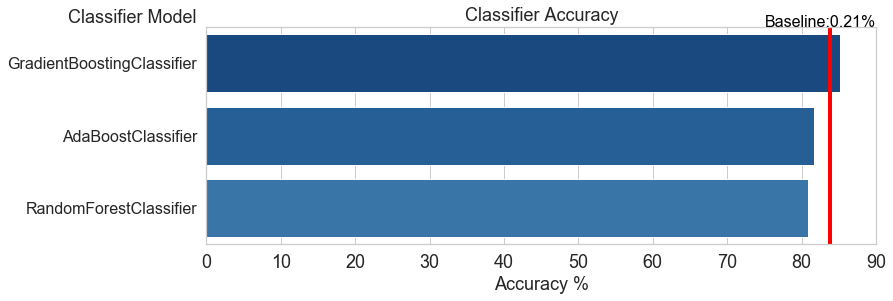

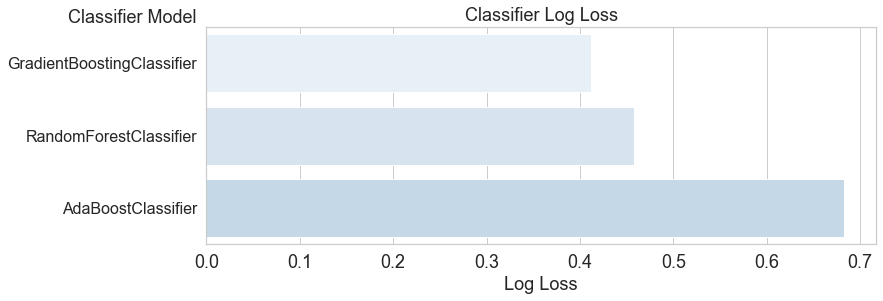

In [117]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(s='Baseline:0.21%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()

plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()

# GRADIENTBOOSTING CLASSIFIER WITH MIN LOG LOSS

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
clf=GradientBoostingClassifier(n_estimators=120,random_state=100)

In [120]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
clf.score(X_test,Y_test)

0.8529411764705882

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
mod=GridSearchCV(clf,param_grid={'n_estimators':np.arange(0,200,10).tolist()})
mod.fit(X_train,Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=120,
                                                  n_iter_no_change=None,
      

In [124]:
mod.best_params_

{'n_estimators': 170}

In [125]:
clf=GradientBoostingClassifier(n_estimators=157,random_state=200)

In [126]:
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8632352941176471

# FEATURE IMPORTANCE

In [127]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

SECOND_TERM_PERFOMANCE    0.258812
BGD 1                     0.103331
MALE                      0.075566
2017_ENGL_A               0.057467
FAT_EDU_3                 0.054994
                            ...   
2017_CHEM                 0.000121
2015_ENGL_A               0.000094
BGD 6                     0.000000
2016_ARTH                 0.000000
const                     0.000000
Length: 85, dtype: float64

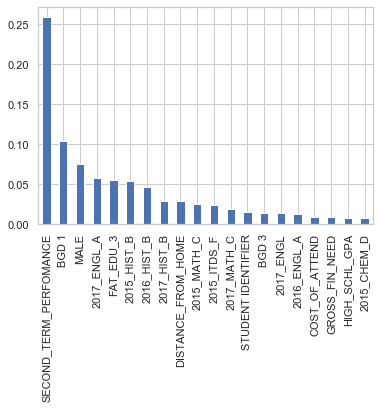

In [128]:
feature_imp.sort_values(ascending=False).head(20).plot(kind='bar')

In [129]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
Y_pred = clf.predict(X_test)
print(len(X_test))
print(accuracy_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

680
0.8632352941176471
0.38461538461538464
[[537  13]
 [ 80  50]]


# CLASSIFICATION RESULTS

In [130]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       550
         1.0       0.79      0.38      0.52       130

    accuracy                           0.86       680
   macro avg       0.83      0.68      0.72       680
weighted avg       0.86      0.86      0.84       680



# ROC_AUC_SCORE

In [131]:
import sklearn.metrics as metrics
metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.7598601398601398

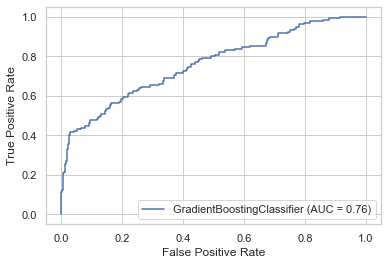

In [132]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, Y_test)
plt.show()

In [133]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=10)
score

array([0.77941176, 0.79705882, 0.77647059, 0.79411765, 0.79705882,
       0.77647059, 0.79117647, 0.83235294, 0.87647059, 0.83235294])

In [134]:
score.mean()

0.8052941176470588